<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
data = []
with open('sat_scores.csv') as f:
    data = f.readlines()

In [3]:
data = [x.replace('\n','') for x in data]
head = data[0].split(',')
data = data[1:]

In [4]:
sat_dict = { h:[k.split(',')[i] for k in data] for i,h in enumerate(head)}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
sat_scores = pd.DataFrame(sat_dict)
sat_scores_df = pd.read_csv('sat_scores.csv')

In [6]:
sat_scores_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [7]:
sat_scores.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [8]:
#using pd.DataFrame you must ideintify where the cloumns names be, when we use 
#pd.read_csv by default it will take the firt row and make it as cloumn names.

In [9]:
print('pd dataframe type: \n', sat_scores_df.dtypes)
print('\n')
print('pd read_csv type: \n', sat_scores.dtypes)

pd dataframe type: 
 State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


pd read_csv type: 
 State     object
Rate      object
Verbal    object
Math      object
dtype: object


In [10]:
#Also, the pd.DataFrame will make all the value as object 
#but pd.read_csv  will change the data type.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
sat_scores_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [12]:
sat_scores_df.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [13]:
sat_scores_df.shape

(52, 4)

In [14]:
descriptions = {
'State': 'State column describe the state',
'Rate': 'Rate column descrebe the state statistics rating for each stat',
'Verbal': 'Verbal describe the average verbal scores of each state',
'Math': 'Math describe the math scores of each state'}

In [15]:
data_dict = {
    'State': {'type': sat_scores_df['State'].dtypes, 'description': descriptions['State']},
    'Rate': {'type': sat_scores_df['Rate'].dtypes, 'description': descriptions['Rate']},
    'Verbal': {'type': sat_scores_df['Verbal'].dtypes, 'description': descriptions['Verbal']},
    'Math': {'type': sat_scores_df['Math'].dtypes, 'description': descriptions['Math']},
    'shape': sat_scores_df.shape
}

In [16]:
data_dict

{'State': {'type': dtype('O'),
  'description': 'State column describe the state'},
 'Rate': {'type': dtype('int64'),
  'description': 'Rate column descrebe the state statistics rating for each stat'},
 'Verbal': {'type': dtype('int64'),
  'description': 'Verbal describe the average verbal scores of each state'},
 'Math': {'type': dtype('int64'),
  'description': 'Math describe the math scores of each state'},
 'shape': (52, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


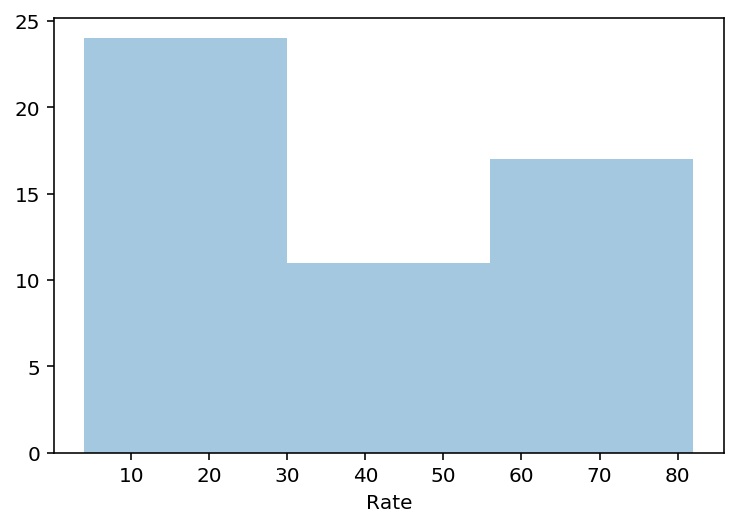

In [17]:
sns.distplot(sat_scores_df['Rate'], kde=False)

/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


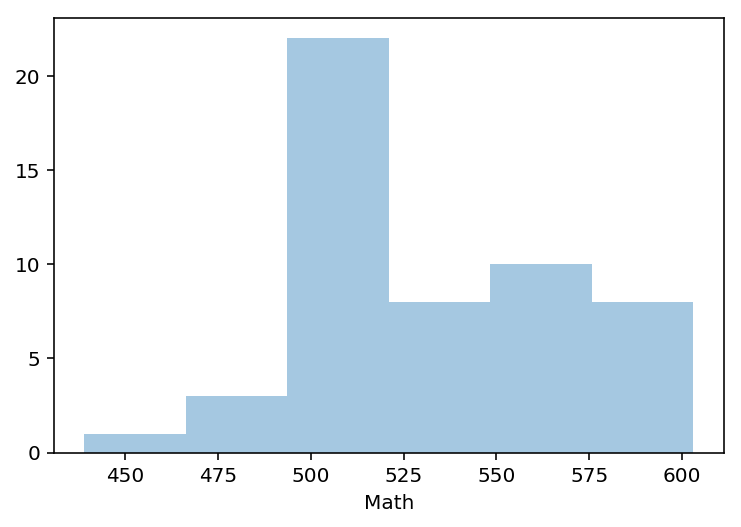

In [18]:
sns.distplot(sat_scores_df['Math'], kde=False)

/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


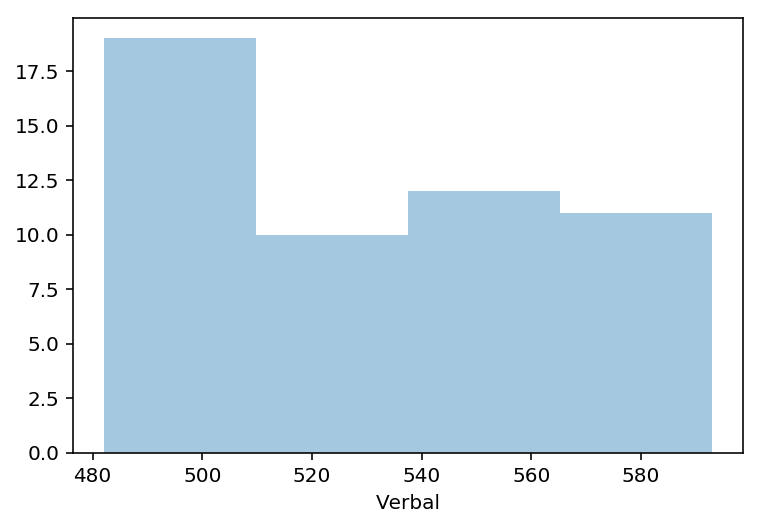

In [19]:
sns.distplot(sat_scores_df['Verbal'], kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

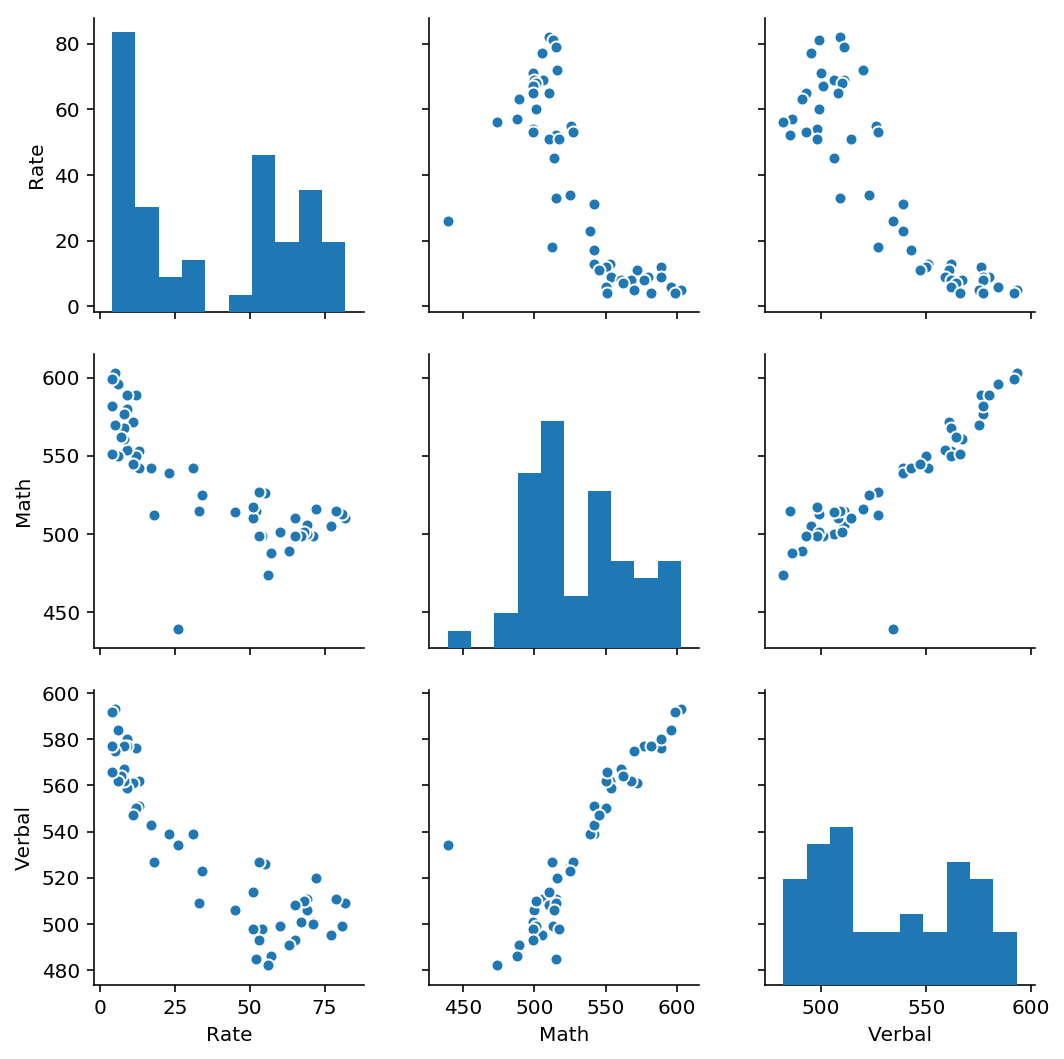

In [20]:
sns.pairplot(data=sat_scores_df[['Rate','Math','Verbal']])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

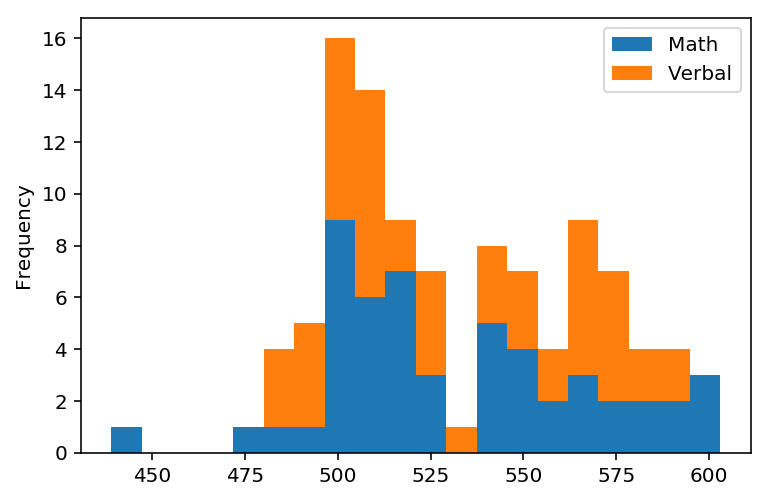

In [21]:
sat_scores_df[['Math','Verbal']].plot.hist(stacked=True, bins=20);

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

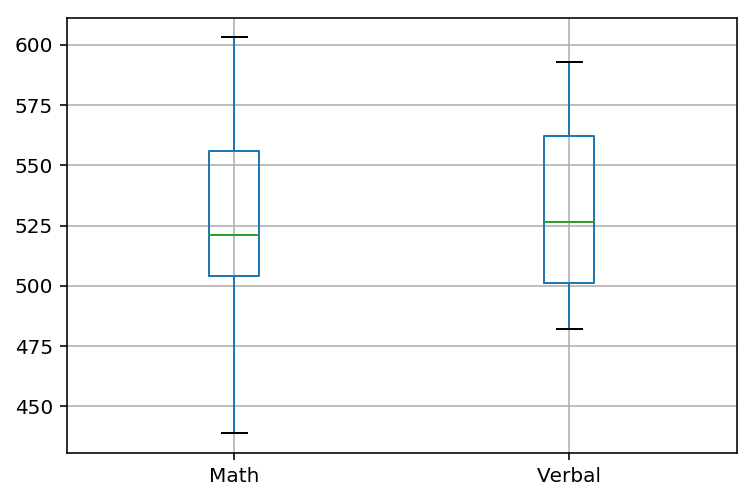

In [22]:
boxplot = sat_scores_df.boxplot(column=['Math','Verbal'])

In [23]:
# In boxplot we can see the quartiles and the mean for each column.

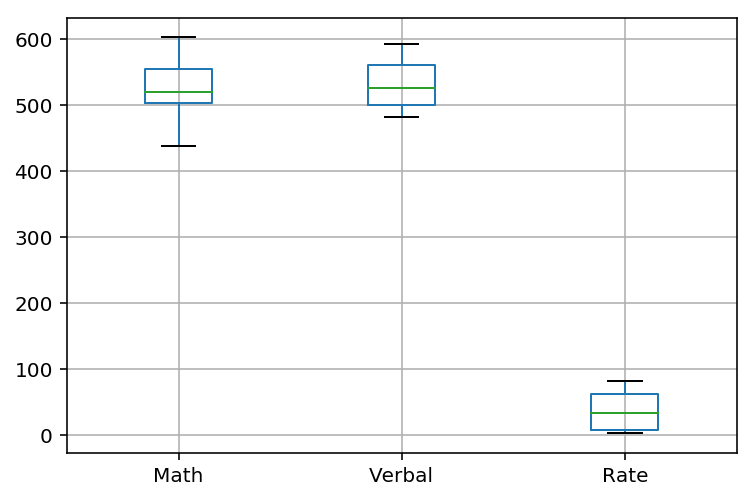

In [24]:
boxplot = sat_scores_df.boxplot(column=['Math','Verbal','Rate'])

In [25]:
#becasue the Rate has diffrent scale than Math and Verbal

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
stand_sat_df = pd.DataFrame(scaler.fit_transform(sat_scores_df[['Math','Rate','Verbal']])
                         , columns= ['Math','Rate','Verbal'])


In [28]:
stand_sat_df.head()

,Math,Rate,Verbal
0,-0.602798,1.658635,-0.699352
1,-0.518687,1.621650,-1.003164
2,-0.462613,1.547680,-0.638589
3,-0.742984,1.473710,-1.124689
4,-0.434575,1.288785,-0.365159


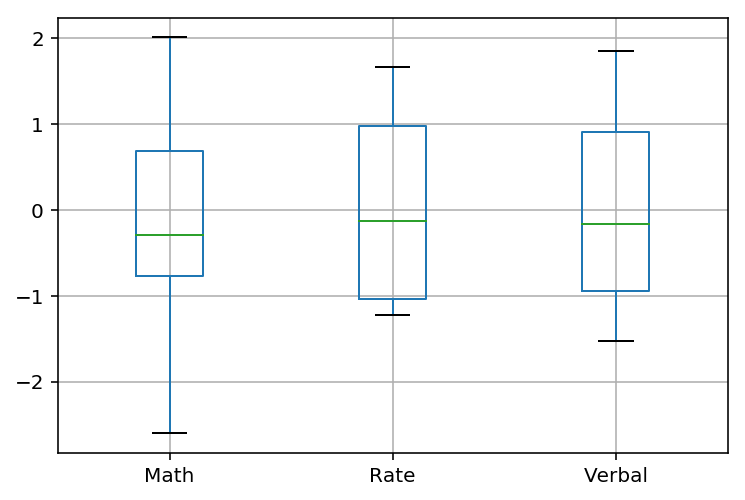

In [29]:
boxplot = stand_sat_df.boxplot(column=['Math','Rate','Verbal'])

In [30]:
#Now, they all in the same scaler.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [31]:
mask = (sat_scores_df.Verbal > sat_scores_df.Verbal.mean())
verbal_mean_values = sat_scores_df.loc[mask,:]

In [32]:
print('Over verbal states ( based on the mean ): \n', verbal_mean_values.head())

Over verbal states ( based on the mean ): 
    State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553


In [33]:
verbal_mean_values.State.count()

24

In [34]:
sat_scores_df.State.count()

52

### 5.2 Find the list of states that have `` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [35]:
mask = (sat_scores_df.Verbal > sat_scores_df.Verbal.median())
verbal_median_values = sat_scores_df.loc[mask,:]

In [36]:
print('Over verbal states ( based on the median) : \n', verbal_median_values.head())

Over verbal states ( based on the median) : 
    State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512


In [37]:
verbal_median_values.Verbal.count()

26

In [38]:
#The distribution of the Verbal is close to be normal Verbal ( mean close to the median).

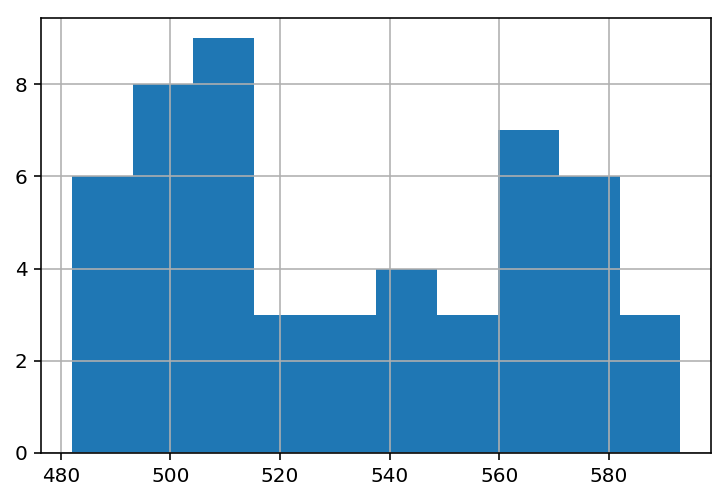

In [39]:
sat_scores_df.Verbal.hist()

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [40]:
sat_scores_df['Diff-VerbalMath'] = sat_scores_df.Verbal -  sat_scores_df.Math

In [41]:
sat_scores_df.head()

,State,Rate,Verbal,Math,Diff-VerbalMath
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [42]:
mask = (sat_scores_df.Verbal > sat_scores_df.Math)

In [43]:
greatest_Diff_scores_VR =  sat_scores_df.loc[mask,:].sort_values('Diff-VerbalMath',ascending = False)

In [44]:
greatest_Diff_scores_VR.head(10)

,State,Rate,Verbal,Math,Diff-VerbalMath
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
41,OK,8,567,561,6
8,ME,69,506,500,6


In [45]:
mask = (sat_scores_df.Verbal < sat_scores_df.Math)

In [46]:
greatest_Diff_scores_MA =  sat_scores_df.loc[mask,:].sort_values('Diff-VerbalMath',ascending = True)

In [47]:
greatest_Diff_scores_MA.head(10)

,State,Rate,Verbal,Math,Diff-VerbalMath
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
51,All,45,506,514,-8


In [48]:
greatest_Diff_scores_VR.head(3)

,State,Rate,Verbal,Math,Diff-VerbalMath
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [49]:
greatest_Diff_scores_MA.head(3)

,State,Rate,Verbal,Math,Diff-VerbalMath
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [50]:
sat_scores_df.corr()

,Rate,Verbal,Math,Diff-VerbalMath
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Diff-VerbalMath,-0.101412,0.052600,-0.388219,1.000000


In [51]:
def correlation_heat_map(df, h, w):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(h, w))

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

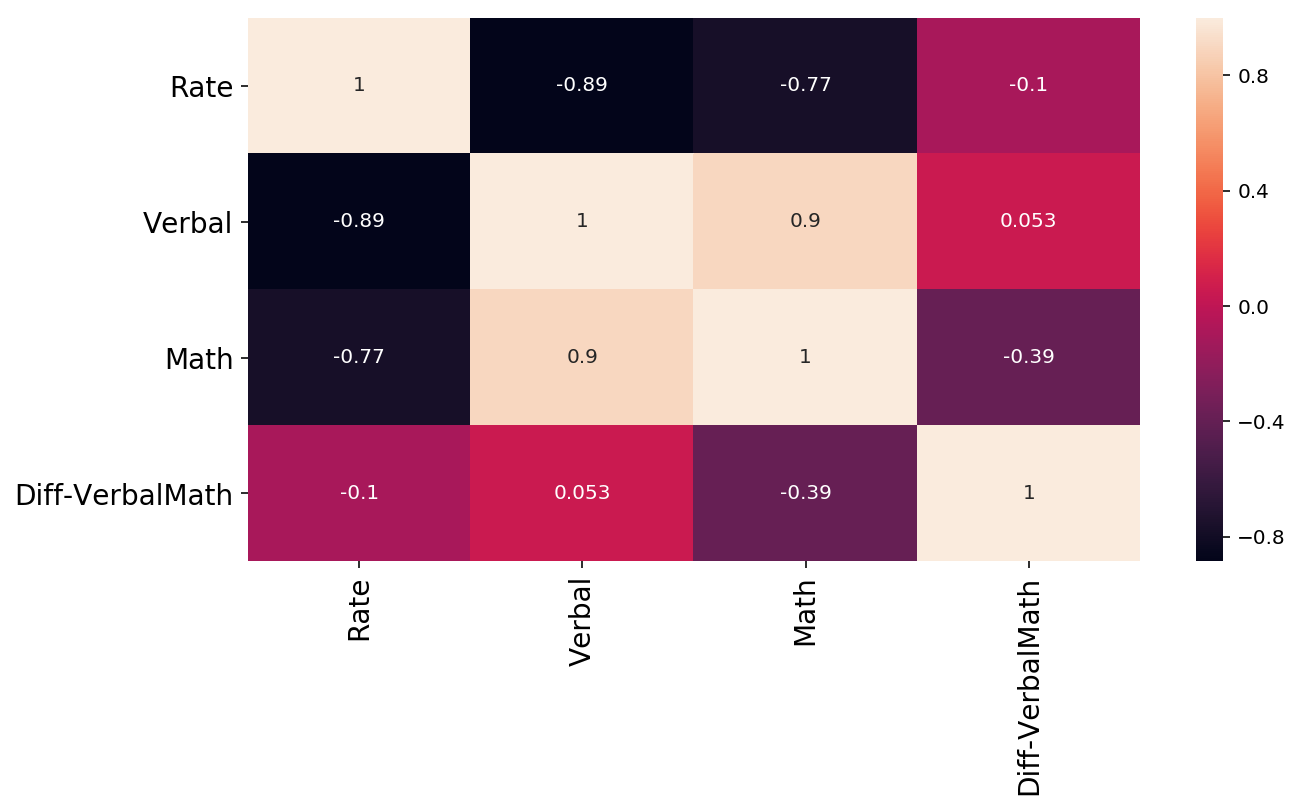

In [52]:
correlation_heat_map(sat_scores_df,10,5)

In [53]:
#The is strong negative correlation between Rate and ( Math and Verbal ).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [54]:
sat_scores_df.describe()

,Rate,Verbal,Math,Diff-VerbalMath
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


In [55]:
# count: the number of value in each column (float).
# mean: the mean value of the each column (float).
# std: the standard deviation for each columb (float).
# min: the minimum value of each column  (float).
# 25%: 25 Q1 (float).
# 50%: 50 Q2 medican (float).
# 75%: 75 Q3 (float).
# max: the maximum value of each column (float).

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [56]:
sat_scores_df.cov()

,Rate,Verbal,Math,Diff-VerbalMath
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Diff-VerbalMath,-43.552036,27.499623,-219.931373,247.430995


In [57]:
#A :

#Q1: 
# covariance matrix : is a measure of the extent to which corresponding elements from two sets of ordered data move in the same direction. 
#We use the following formula to compute covariance.
# correlation matrix : The values of the correlation coefficient can range from -1 to +1. The closer it is to +1 or -1.
#---------------------------------------------------------


#Q2:  

let $X$ and $Y$ be our two variables, with covariance $cov(X, Y)$ that we calculated above:

$$\text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

In [58]:

#---------------------------------------------------------
#Q3: 
#The problem with covariances is that they are hard to compare.
#You will get a different covariance from when you do it in other units
#Correlation is a special case of covariance which can be obtained when the data is standardized.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [59]:
#Load durg dataset
file='../../../../resource-datasets/drug_use_by_age/drug-use-by-age.csv'
drug_df = pd.read_csv(file)

In [60]:
drug_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [61]:
drug_df.shape

(17, 28)

In [62]:
#No variables missing in this dataset
drug_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [63]:
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [64]:
# 1. Rename all the columns name that contain - to  _
# 2. cocaine-frequency, heroin-frequency, crack-frequency, ...etc must be float not object
# 3. age column must be int not object

In [65]:
#Step 1
columns_names = [name.replace('-','_') for name in drug_df.columns ]

In [66]:
drug_df.columns = columns_names

In [67]:
drug_df.head()

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [68]:
#Step 2
#check the data
drug_df['cocaine_frequency'].values

array(['5.0', '1.0', '5.5', '4.0', '7.0', '5.0', '5.0', '5.5', '8.0',
       '5.0', '5.0', '6.0', '5.0', '8.0', '15.0', '36.0', '-'],
      dtype=object)

In [69]:

drug_df.cocaine_frequency = [float(row_data.replace('-','0')) for row_data in drug_df.cocaine_frequency ]
drug_df.heroin_frequency  = [float(row_data.replace('-','0')) for row_data in drug_df.heroin_frequency  ]
drug_df.crack_frequency = [float(row_data.replace('-','0')) for row_data in drug_df.crack_frequency ]
drug_df.inhalant_frequency = [float(row_data.replace('-','0')) for row_data in drug_df.inhalant_frequency ]
drug_df.oxycontin_frequency = [float(row_data.replace('-','0')) for row_data in drug_df.oxycontin_frequency ]
drug_df.meth_frequency = [float(row_data.replace('-','0')) for row_data in drug_df.meth_frequency ]


In [70]:
drug_df.dtypes

age                         object
n                            int64
alcohol_use                float64
alcohol_frequency          float64
marijuana_use              float64
marijuana_frequency        float64
cocaine_use                float64
cocaine_frequency          float64
crack_use                  float64
crack_frequency            float64
heroin_use                 float64
heroin_frequency           float64
hallucinogen_use           float64
hallucinogen_frequency     float64
inhalant_use               float64
inhalant_frequency         float64
pain_releiver_use          float64
pain_releiver_frequency    float64
oxycontin_use              float64
oxycontin_frequency        float64
tranquilizer_use           float64
tranquilizer_frequency     float64
stimulant_use              float64
stimulant_frequency        float64
meth_use                   float64
meth_frequency             float64
sedative_use               float64
sedative_frequency         float64
dtype: object

In [71]:
drug_df.age.values

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [72]:
drug_df.age = [float(x[0:2]+x[3:5])/2.0 if x in '-' else float(x[0:2])  for x in drug_df.age  ]

In [73]:
drug_df.age.values

array([12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 24., 26.,
       30., 35., 50., 65.])

In [74]:
#Now we have a clean data

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

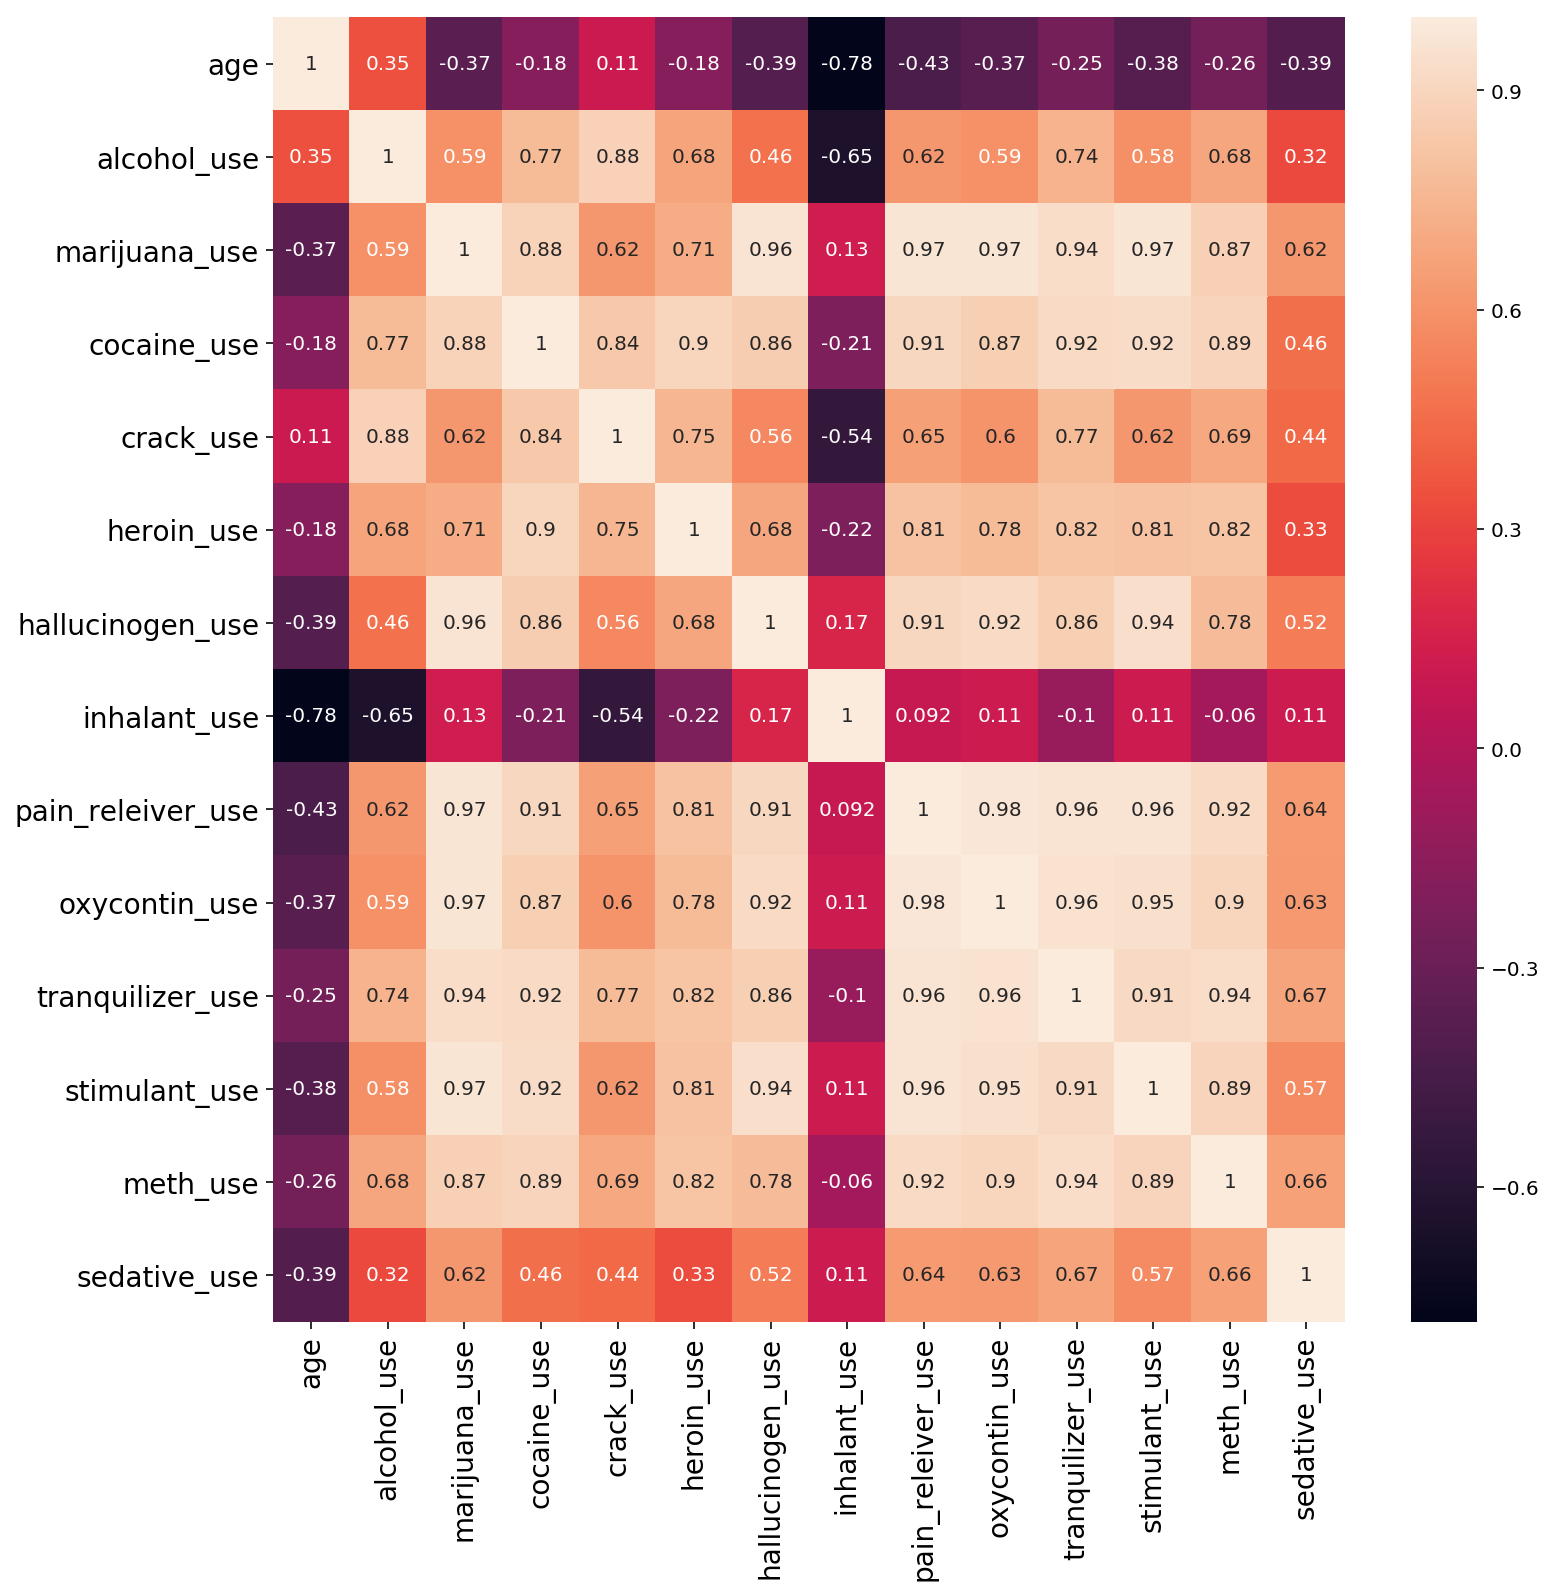

In [75]:
#get the 'uses' columns to show the corr 

drug_use = drug_df[['age','alcohol_use','marijuana_use','cocaine_use'
                     ,'crack_use','heroin_use','hallucinogen_use','inhalant_use'
                     ,'pain_releiver_use','oxycontin_use','tranquilizer_use','stimulant_use','meth_use','sedative_use']]

correlation_heat_map(drug_use,12,12)

In [76]:
#From the uses heatmap we can see the strong negative relation between inhalant_use 
#and (crack_use, alcohol_use) so we can use them all or one of them to conclude the inhalant_use

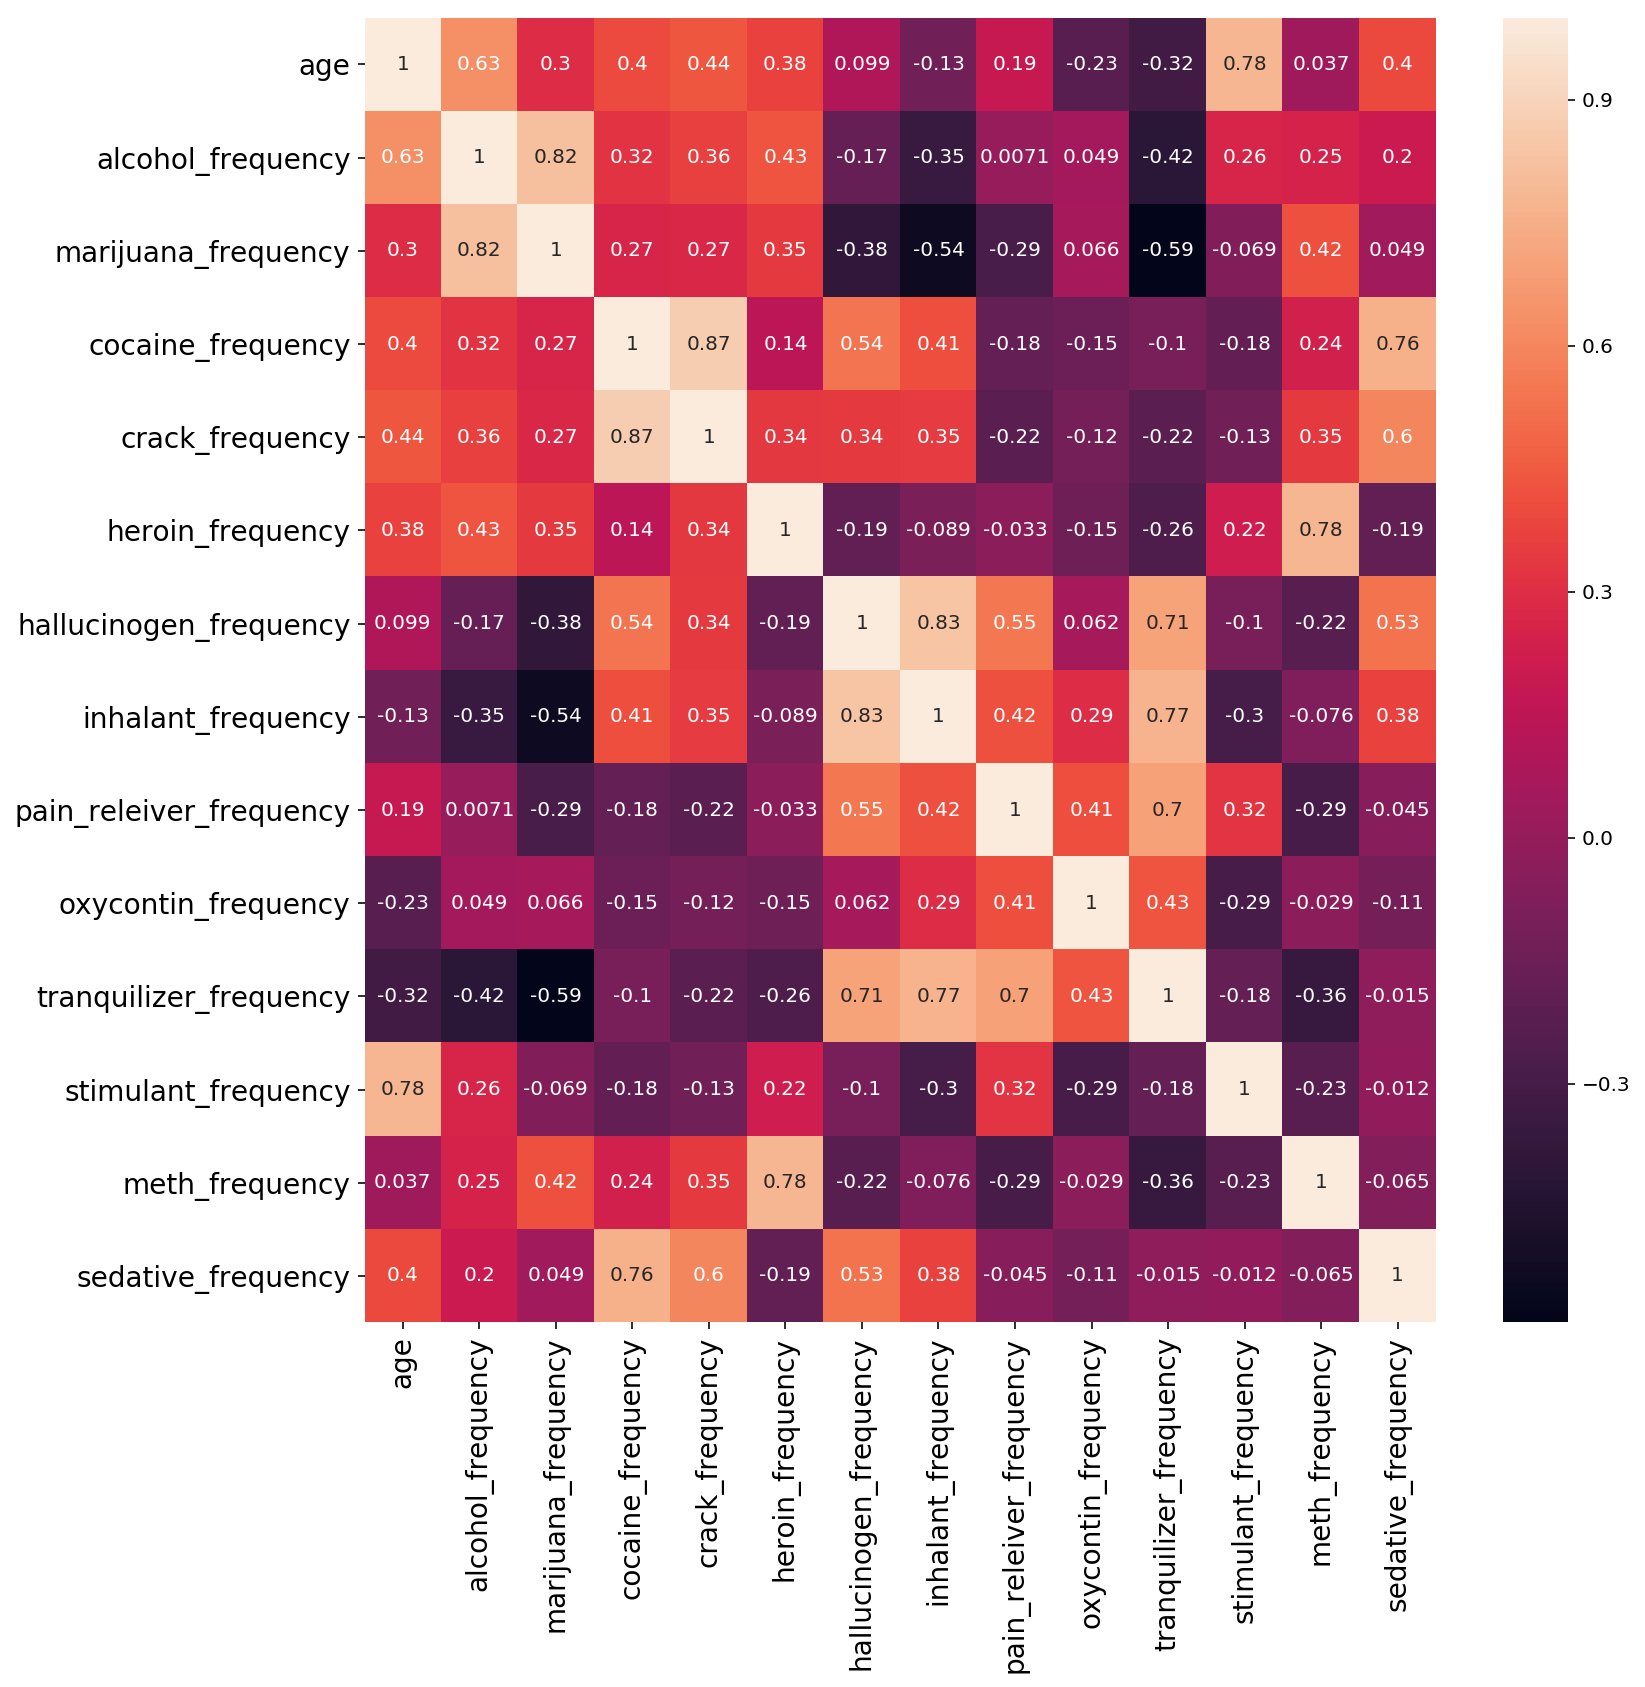

In [77]:
drug_frequency = drug_df[['age','alcohol_frequency','marijuana_frequency','cocaine_frequency','crack_frequency'
                     ,'heroin_frequency','hallucinogen_frequency','inhalant_frequency','pain_releiver_frequency'
                     ,'oxycontin_frequency','tranquilizer_frequency','stimulant_frequency','meth_frequency'
                     ,'sedative_frequency']]
correlation_heat_map(drug_frequency,12,12)

In [78]:
#From frequency heatmap we can see diffirent realtions ( negative and positive ) 

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [79]:
# Question:
#Is there any realtion (positive or negative) between the frequency of 
#the alcohol_use use and the inhalant_use? 

/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


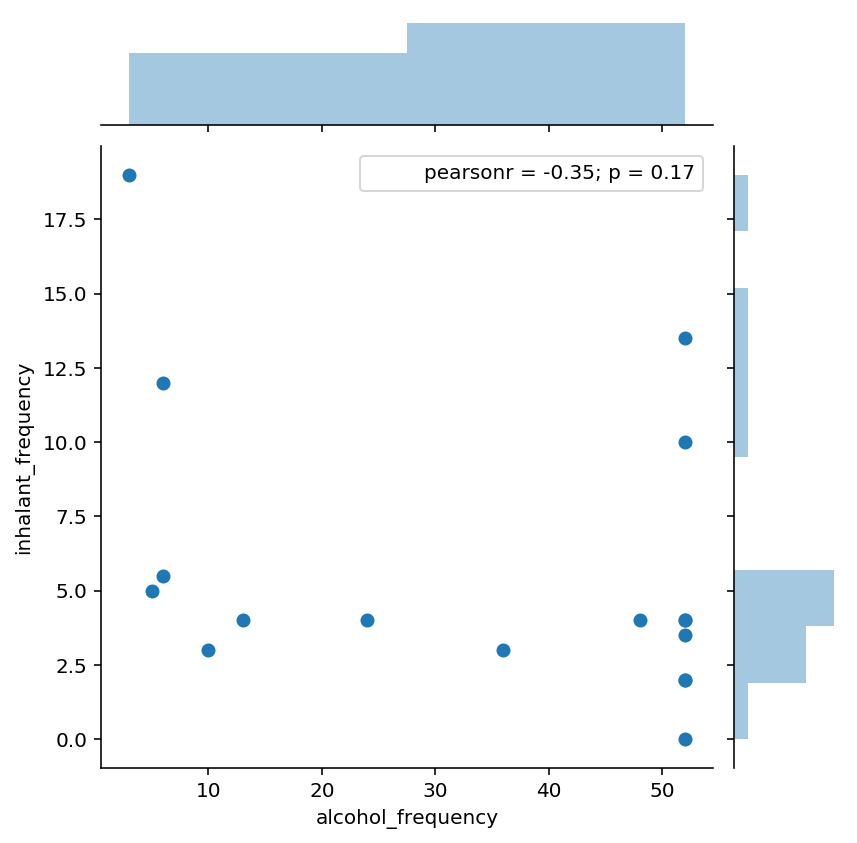

In [80]:
sns.jointplot(drug_df.alcohol_frequency, drug_df.inhalant_frequency)

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [81]:
# 1.
rate = sat_scores_df[['Rate']]

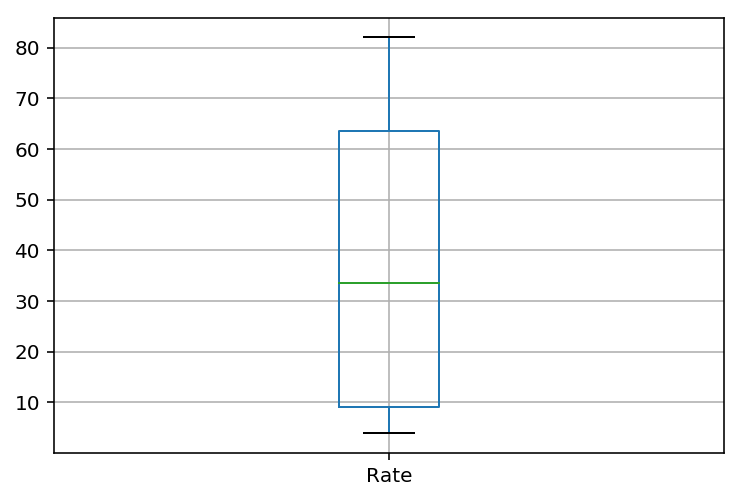

In [82]:
# 2.
rate.boxplot()

In [83]:
rate.describe()

,Rate
count,52.000000
mean,37.153846
std,27.301788
min,4.000000
25%,9.000000
50%,33.500000
75%,63.500000
max,82.000000


In [84]:
#From the quartiles we can see that the rate has some outliers. I will define the outliers 
#as any rate < 2*std + mean 

In [85]:
outliers_clc = (2*rate.std()) + rate.mean()

In [86]:
from collections import Counter

In [87]:
rate_outiles = (rate > outliers_clc)

In [88]:
sum(rate_outiles.Rate) #If there is an outlier will be True and sum will count it as 1

0

In [89]:
#there is no outliers in the Rate 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [90]:
from scipy.stats import spearmanr

In [91]:
spearmanr(sat_scores_df.Verbal, sat_scores_df.Math)

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

In [92]:
#1.
# The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.
# The Pearson correlation evaluates the linear relationship between two continuous variables

#Also, Spearman’s rank correlation is an alternative that mitigates the effect of outliers 
#and skewed distributions. To compute Spearman’s correlation, we have to compute the rank 
#of each value, which is its index in the sorted sample. For example, in the sample {
#7, 1, 2, 5} the rank of the value 5 is 3, because it appears third if we sort the 
#elements. Then we compute Pearson’s correlation for the ranks.
#An alternative to Spearman’s is to apply a transform that makes 
#the data more nearly normal, then compute Pearson’s correlation for the transformed data. 

In [93]:
#2.
#The Spearman's Rank Correlation Coefficient is used to discover the strength of a link between two sets of data.
#Each of the two variables is ranked separately, and the ordinary Pearson correlation coefficient is computed on 
#the ranks. This nonparametric correlation coefficient is a good measure of the association between two variables when outliers,
#nonnormality, nonconstant variance, and nonlinearity may exist between the two variables being investigated

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

In [94]:
#1.
sat_scores_df.Rate.values

array([82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56,
       55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12,
       12, 11, 11,  9,  9,  9,  8,  8,  8,  7,  6,  6,  5,  5,  4,  4,  4,
       45])

In [95]:
percentile_of_score_Rate = []
rate = sat_scores_df.Rate.values
for i in range(len(sat_scores_df.Rate)):
    percentile_of_score_Rate.append(stats.percentileofscore(rate,rate[i]))

In [97]:
sat_scores_df['percentile_of_score_Rate'] = percentile_of_score_Rate

In [98]:
sat_scores_df.head(3)

,State,Rate,Verbal,Math,Diff-VerbalMath,percentile_of_score_Rate
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846


In [99]:
#2.
mask = (sat_scores_df.State == 'CA')
sat_scores_df.loc[mask]

,State,Rate,Verbal,Math,Diff-VerbalMath,percentile_of_score_Rate
23,CA,51,498,517,-19,56.730769


In [100]:
#3.
#The percentile score 
#is percentage of how many value in my list the less than or equal to the rank.
#The number of points > rank divid by all points 

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

In [101]:
# 1.
# We usually use IQR to identify outliers with Q1 and Q3. But we can use the percentile scoring 
# to check if the value is less than Q1 or above Q3 we consider it as outliers


/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


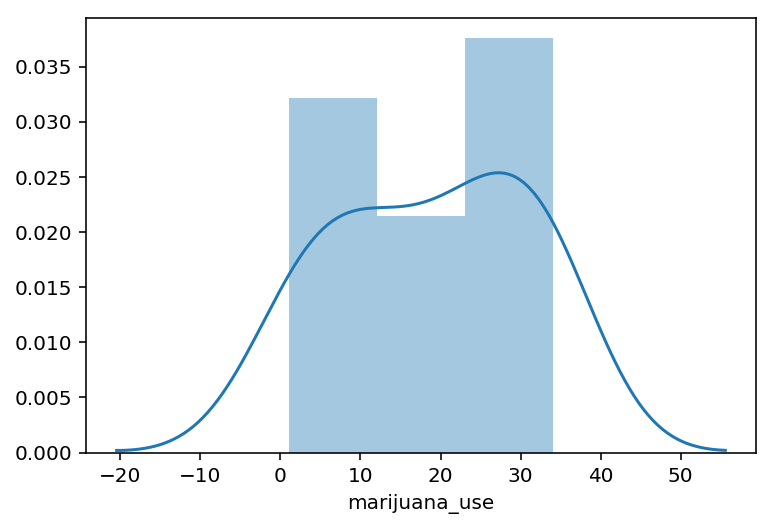

In [105]:
sns.distplot(drug_df.marijuana_use)

In [103]:
percentile_of_score_Rate = []
marijuana_use_values = drug_df.marijuana_use.values
for i in range(len(marijuana_use_values)):
    percentile_of_score_Rate.append(stats.percentileofscore(marijuana_use_values,marijuana_use_values[i]))

/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


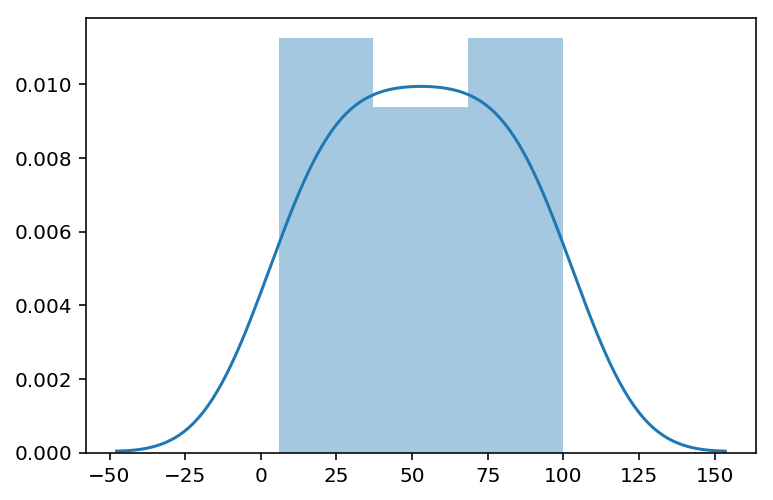

In [107]:
sns.distplot(percentile_of_score_Rate)

In [ ]:
# The values of the marijuana_use after the percentile score are become symmetric. 